In [1]:
import subprocess
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [8]:
subprocess.check_output(["make"])

b'g++ main.cpp -o main.x -std=c++14\n'

Starting position:  5.000389998825284 5.000108350815509 7.070715405088306
Wind speed:  1  m/s


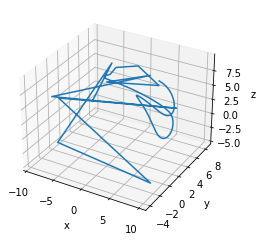

Starting position:  5.000714928318654 4.999153314907063 7.071160890528844
Wind speed:  5  m/s


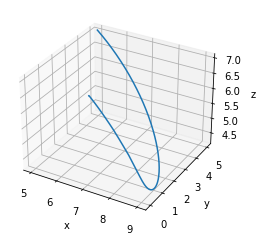

Starting position:  5.001733535652496 4.9961730653765795 7.07254666574458
Wind speed:  10  m/s


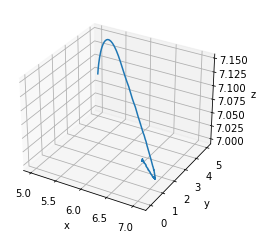

Starting position:  5.005765155815988 4.984235039720203 7.078115305195578
Wind speed:  20  m/s


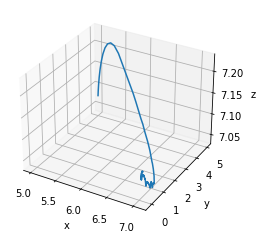

Starting position:  5.012437919061828 4.964337880080921 7.087370141310867
Wind speed:  30  m/s


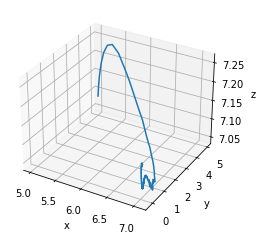

In [9]:
windspeeds=[1, 5, 10, 20, 30] #m/s
for windspeed in windspeeds:
    fig=plt.figure()
    ax = fig.add_subplot(111, projection = '3d')
    theta=[]
    phi=[]
    r=[]
    position_list=subprocess.check_output(["./main.x", "%d"%windspeed]).decode() #simulating for 10 minutes, step=0.01
    position_list=position_list.split("\n")
    for line in position_list[:-1]:
        line=line.split(' ')
        theta.append(float(line[4]))
        phi.append(float(line[5]))
        r.append(float(line[6]))
    theta=np.array(theta)
    phi=np.array(phi)
    r=np.array(r)
    x=np.multiply(r, np.multiply(np.sin(theta), np.cos(phi)))
    y=np.multiply(r, np.multiply(np.sin(theta), np.sin(phi)))
    z=np.multiply(r, np.cos(theta))
    print("Starting position: ",x[0], y[0], z[0])
    ax.plot(x, y, z)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    print("Wind speed: ", windspeed, " m/s")
    plt.show()